In [1]:
import sys

!pip install ydata-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c12ec0934d7ae073ed9a3af9fe33f4701fa9efbd64609b391306252f24c54858
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/CKD Data.csv'
df = pd.read_csv(file_path)

# Data Cleaning: Handling missing or inconsistent data
# Removing the first row since it appears to be attribute type information
df_cleaned = df.iloc[2:].reset_index(drop=True)

# Handling missing values - replacing missing values with NaN and imputing them with appropriate measures
df_cleaned.replace("?", pd.NA, inplace=True)
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])  # Impute categorical with mode
    else:
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())  # Impute numerical with median

# Cleaning numerical columns that have ranges or inconsistent formats
def clean_numerical_column(column):
    # Replace ranges and other inconsistent values with NaN
    column = column.str.extract(r'([0-9.]+)').astype(float)
    return column

numerical_columns_to_clean = ["sg", "al", "bgr", "bu", "sod", "sc", "pot", "hemo", "pcv", "rbcc", "wbcc", "grf", "age"]
for col in numerical_columns_to_clean:
    df_cleaned[col] = clean_numerical_column(df_cleaned[col])

# Converting all variables to categorical types with specified categories in one step
# Categorizing discrete and numerical attributes
categorical_mappings = {
    "bp (Diastolic)": {
        "0": "Low",
        "1": "Normal",
        "2": "High"
    },
    "bp limit": {
        "0": "Normal",
        "1": "Stage 1 Hypertension",
        "2": "Stage 2 Hypertension"
    },
    "class": {
        "ckd": "Yes",
        "notckd": "No"
    },
    "rbc": {
        "0": "Normal",
        "1": "Abnormal"
    },
    "su": {
        "<1.007": "None",
        "1.009-1.011": "Trace",
        "1.015-1.017": "Moderate",
        "1.019-1.021": "High",
        ">1.023": "Very High"
    },
    "pc": {
        "0": "Normal",
        "1": "Abnormal"
    },
    "pcc": {
        "0": "Not present",
        "1": "Present"
    },
    "ba": {
        "0": "Not present",
        "1": "Present"
    },
    "htn": {
        "0": "No",
        "1": "Yes"
    },
    "dm": {
        "0": "No",
        "1": "Yes"
    },
    "cad": {
        "0": "No",
        "1": "Yes"
    },
    "appet": {
        "0": "Good",
        "1": "Poor"
    },
    "pe": {
        "0": "No",
        "1": "Yes"
    },
    "ane": {
        "0": "No",
        "1": "Yes"
    },
    "stage": {
        "s1": "Stage 1",
        "s2": "Stage 2",
        "s3": "Stage 3",
        "s4": "Stage 4",
        "s5": "Stage 5"
    },
    "affected": {
        "0": "Left or Right",
        "1": "Both"
    }
}

df_cleaned = df_cleaned.apply(lambda col: col.map(categorical_mappings[col.name]) if col.name in categorical_mappings else col)
for col in categorical_mappings.keys():
    df_cleaned[col] = df_cleaned[col].astype('category')




In [14]:
# Let's display first 10 records
df_cleaned.head(10)


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,Low,Normal,1.019,1.0,Yes,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,227.9440,Stage 1,Both,12.0
1,Low,Normal,1.009,0.0,Yes,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,227.9440,Stage 1,Both,12.0
2,Low,Normal,1.009,4.0,Yes,Abnormal,NaN,Abnormal,Not present,Present,...,No,No,No,Poor,No,No,127.2810,Stage 1,Both,12.0
3,Normal,Stage 1 Hypertension,1.009,3.0,Yes,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,127.2810,Stage 1,Both,12.0
4,Low,Normal,1.015,0.0,Yes,Normal,NaN,Normal,Not present,Not present,...,No,Yes,No,Poor,Yes,No,127.2810,Stage 1,Both,12.0
5,Normal,Stage 1 Hypertension,1.023,0.0,No,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,102.1150,Stage 1,Left or Right,12.0
6,Low,Normal,1.019,3.0,Yes,Normal,NaN,Normal,Not present,Not present,...,Yes,Yes,No,Good,No,No,177.6120,Stage 1,Both,12.0
7,Low,Normal,1.019,0.0,Yes,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,26.6175,Stage 4,Both,12.0
8,Low,Normal,1.023,0.0,No,Normal,NaN,Normal,Not present,Not present,...,No,No,No,Good,No,No,26.6175,Stage 4,Left or Right,20.0
9,Normal,Stage 2 Hypertension,1.009,4.0,Yes,Normal,NaN,Abnormal,Present,Present,...,No,No,No,Good,No,Yes,51.7832,Stage 3,Both,20.0


In [15]:
# look at meta information about data, such as null values
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bp (Diastolic)  200 non-null    category
 1   bp limit        200 non-null    category
 2   sg              200 non-null    float64 
 3   al              200 non-null    float64 
 4   class           200 non-null    category
 5   rbc             200 non-null    category
 6   su              0 non-null      category
 7   pc              200 non-null    category
 8   pcc             200 non-null    category
 9   ba              200 non-null    category
 10  bgr             200 non-null    float64 
 11  bu              200 non-null    float64 
 12  sod             200 non-null    float64 
 13  sc              200 non-null    float64 
 14  pot             200 non-null    float64 
 15  hemo            200 non-null    float64 
 16  pcv             200 non-null    float64 
 17  rbcc            

In [16]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df_cleaned.describe()

,sg,al,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,grf,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,199.000000,200.000000
mean,1.016670,0.980000,144.130000,64.483000,134.950000,4.295750,7.640750,11.61850,36.015500,4.445250,7621.800000,62.153093,49.630000
std,0.005052,1.329828,70.704162,41.580617,6.276502,2.571269,3.306577,2.74459,7.944639,0.841562,2759.797669,50.528530,15.935583
min,1.007000,0.000000,112.000000,48.100000,118.000000,3.650000,7.310000,6.10000,17.900000,2.690000,4980.000000,26.617500,12.000000
25%,1.015000,0.000000,112.000000,48.100000,133.000000,3.650000,7.310000,10.00000,29.600000,3.870000,4980.000000,26.617500,43.000000
50%,1.019000,0.000000,112.000000,48.100000,133.000000,3.650000,7.310000,11.30000,37.400000,4.460000,7360.000000,26.617500,51.000000
75%,1.019000,2.000000,154.000000,48.100000,138.000000,3.650000,7.310000,13.90000,41.300000,5.050000,7360.000000,76.949000,59.000000
max,1.023000,4.000000,448.000000,352.900000,158.000000,28.850000,42.590000,16.50000,49.100000,7.410000,24020.000000,227.944000,74.000000


# First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding.

**Let's develop a decison tree in Python**

In [17]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features
class_col_name='class'

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X_train
for column in X_train.columns:
    # Check if the column contains string values
    if X_train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        # Get unique values from both train and test sets
        all_unique_values = pd.unique(pd.concat([X_train[column], X_test[column]]))
        encoder.fit(all_unique_values)

        # Transform the column values to numerical labels
        X_train[column] = encoder.transform(X_train[column])
        # Transform the corresponding column in X_test using the same encoder
        X_test[column] = encoder.transform(X_test[column])

# Impute missing values using pandas fillna with the mean for numeric features
# This will replace NaN values with the mean of the respective column
# You can also consider other strategies like median, mode or a constant value.
for column in X_train.select_dtypes(include=['number']).columns: # Impute only numeric features
    X_train[column] = X_train[column].fillna(X_train[column].mean()) # Fill NaN with mean for X_train
    X_test[column] = X_test[column].fillna(X_test[column].mean())   # Fill NaN with mean for X_test

# Impute missing values in y_train if it's not numeric (e.g., categorical)
# Use the most frequent value (mode) for categorical target variables
if y_train.dtype == 'object':
    y_train = y_train.fillna(y_train.mode()[0])  # Use mode for categorical target
    y_test = y_test.fillna(y_test.mode()[0])    # Use mode for categorical target

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Let's plot the ree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['discrete', 'ckd', 'notckd']


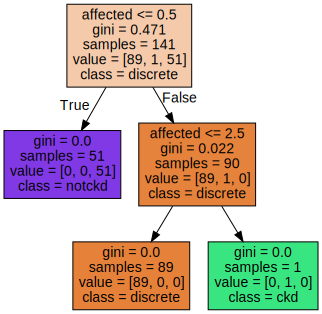

In [21]:
import graphviz
import numpy as np
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
# Remove nan values if exist
class_values = [v for v in class_values if not isinstance(v, float) or not np.isnan(v)]
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph


In [22]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [23]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[40  0]
 [ 0 21]]
TP:  21 , FP:  0 , TN:  40 , FN: 0


In [24]:
#print precision, recall, and accuracy from the perspective of each of the class
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        40
      notckd       1.00      1.00      1.00        21

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [25]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 29


Let's understand our Naive Bayes model

In [27]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  28
Classes  ['ckd' 'discrete' 'notckd']
Number of records for classes  [89.  1. 51.]
Log prior probability for classes  [-0.46012352 -4.94875989 -1.01693426]
Log conditional probability for each feature given a class
 [[-4.59328161 -4.10080513 -3.94665445 -3.39112865 -5.71024304 -2.85441161
  -5.07425427 -5.38173897 -6.11570815 -2.88030302 -2.61667852 -2.93073388
  -2.6657206  -3.41322899 -3.05153871 -2.75707038 -3.16253549 -2.54852563
  -4.54017179 -4.61163075 -5.65617582 -5.1666276  -5.30477793 -5.34251826
  -2.09184566 -2.8322938  -4.08975529 -2.39202477]
 [-4.03128643 -3.74360435 -3.33813925 -3.33813925 -4.03128643 -3.18398857
  -4.03128643 -4.03128643 -4.03128643 -2.73200344 -2.93267414 -2.82731362
  -3.05045717 -3.5204608  -2.73200344 -2.73200344 -2.82731362 -2.82731362
  -4.03128643 -4.03128643 -4.03128643 -4.03128643 -4.03128643 -4.03128643
  -2.64499207 -5.12989871 -3.74360435 -2.73200344]
 [-4.91571393 -4.91571393 -3.03752195 -3.05681516 -8.09376776 -

Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. let's see classification report.

In [29]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ckd       1.00      0.97      0.99        40
      notckd       0.95      1.00      0.98        21

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



# Section 2: Categorical to One-Hot (numeric) Encoding
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [30]:
#Let's create a list for our categorical columns

cat_cols=["bp (Diastolic)","bp limit","sg","al","rbc"\
          ,"su","pc","pcc","ba","bgr","bu", \
          "sod","sc","pot","hemo","pcv","rbcc","wbcc","htn",\
          "dm","cad","appet","pe","ane","grf",\
          "stage","affected","age"]


In [31]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,class,bp (Diastolic)_0,bp (Diastolic)_1,bp (Diastolic)_discrete,bp limit_0,bp limit_1,bp limit_2,bp limit_discrete,sg_1.009 - 1.011,sg_1.015 - 1.017,...,age_27 - 35,age_35 - 43,age_43 - 51,age_51 - 59,age_59 - 66,age_66 - 74,age_< 12,age_> 74,age_discrete,age_meta
0,discrete,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,ckd,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,ckd,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,ckd,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,ckd,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
198,ckd,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
199,notckd,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
200,notckd,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="class"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [33]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [34]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  175
Classes  ['ckd' 'discrete' 'notckd']
Number of records for classes  [92.  1. 48.]
Log prior probability for classes  [-0.42697131 -4.94875989 -1.07755888]
Log conditional probability for each feature given a class
 [[-4.18205014 -3.96847604 -7.91971976 -4.13553013 -5.029348   -4.4232122
  -7.91971976 -4.48573256 -4.62388289 -4.55242393 -6.5334254  -6.12796029
  -7.91971976 -5.21166956 -5.08650642 -5.029348   -4.4232122  -5.28066243
  -7.91971976 -3.60223165 -4.97528078 -7.91971976 -6.5334254  -5.52182449
  -6.12796029 -6.31028185 -3.67122452 -7.22657258 -7.91971976 -3.8253752
  -4.39335924 -7.91971976 -3.61565467 -4.92398749 -7.91971976 -3.46537246
  -5.84027822 -7.91971976 -4.4232122  -5.72249518 -5.52182449 -5.61713467
  -6.82110747 -7.22657258 -7.22657258 -6.5334254  -4.70084394 -6.82110747
  -7.91971976 -5.52182449 -6.31028185 -6.31028185 -7.22657258 -4.55242393
  -5.28066243 -4.4232122  -7.91971976 -7.91971976 -6.5334254  -6.31028185
  -5.43481311 -3.9

We have probailities of a lot more features now.

See evaluation metrics below.

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
# This ensures that all unique labels from both arrays are known to the encoder
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now calculate the confusion matrix using the encoded labels
cf = confusion_matrix(y_test_encoded, y_pred_encoded)
print("Confusion Matrix")
print(cf)

# Check the shape of the confusion matrix
print("Shape of confusion matrix:", cf.shape)

# If the confusion matrix is 2x2, unpack as before
if cf.shape == (2, 2):
    tn, fp, fn, tp = cf.ravel()
    print("TP: ", tp, ", FP: ", fp, ", TN: ", tn, ", FN:", fn)
# Otherwise, handle the multi-class case
else:
    # Access elements using indexing
    # Example for a 3x3 matrix
    # Assuming labels are 0, 1, 2
    # tp_0 = cf[0, 0]  # True positives for class 0
    # fp_0 = cf[0, 1] + cf[0, 2] # False positives for class 0
    # ...
    print("Multi-class confusion matrix. Handle elements using indexing.")

Confusion Matrix
[[35  0  1  0]
 [ 0  0  0  0]
 [ 0  0 24  0]
 [ 0  1  0  0]]
Shape of confusion matrix: (4, 4)
Multi-class confusion matrix. Handle elements using indexing.


In [36]:
# Assuming y_test and y_pred are the original arrays
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now use the encoded labels in the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_encoded))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.00      0.00      0.00         0
           2       0.96      1.00      0.98        24
           3       0.00      0.00      0.00         1

    accuracy                           0.97        61
   macro avg       0.49      0.49      0.49        61
weighted avg       0.97      0.97      0.97        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**Let's run decision tree on one-hot encoded data**

class Names ['discrete' 'ckd' 'notckd']


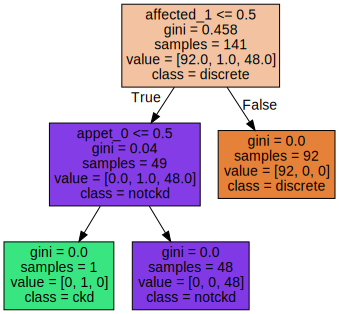

In [37]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz

# Assuming 'df_onehot' is your DataFrame and 'class_col_name' is 'class'
# Drop rows with NaN values in the 'class' column
df_onehot = df_onehot.dropna(subset=[class_col_name])

# Recalculate unique class values after dropping NaNs
class_values = df_onehot[class_col_name].unique()
print("class Names", class_values)

# Build DecisionTreeClassifier with adjusted input data (df_onehot).
# Instead of using df_onehot.index directly, get the common indices between
# df_onehot and X_train/y_train
not_null_class_index = df_onehot.index
common_index = not_null_class_index.intersection(X_train.index)

# Use the common index to extract data from X_train and y_train:
X_train_not_null = X_train.loc[common_index]
y_train_not_null = y_train.loc[common_index]

# Train the Decision Tree on the valid values:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train_not_null, y_train_not_null)

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=one_hot_feature_names,  # Assuming this variable is defined
    class_names=class_values,
    filled=True,
)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [38]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [39]:
# Assuming y_test and y_pred are the original arrays
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now use the encoded labels in the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_encoded)) # Use encoded labels here

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        24
           3       0.00      0.00      0.00         1

    accuracy                           0.98        61
   macro avg       0.50      0.50      0.50        61
weighted avg       0.98      0.98      0.98        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [40]:

from ydata_profiling import ProfileReport

# Generate the data profiling report
report = ProfileReport(df)



In [41]:
#Display report
report
#To save to HTML file
#report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use:

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```



In [ ]:
#df=df.drop(columns=['Phone Number'])
#df.to_csv("somename.csv")
